# Fashion MNIST Project
#### Fashion-MNIST is a dataset consisting of a training set of 60,000 images and a testing set of 10,000 images. Each image is 28x28 grayscale, associated with a label from 10 different features.

Using different Machine Learning Algorithims (Supervised, Unsupervised and Deep Learning), I will try to get the models to predict what type of clothing/label is in each 28x28 grayscale image with the highest accuracy I can achieve.

Alon Firestein

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn import tree
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [17]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train Shape:", x_train.shape,"\n" "y_train Shape:", y_train.shape)
print("x_test Shape:", x_test.shape,"\n" "y_test Shape:", y_test.shape)

x_train Shape: (60000, 28, 28) 
y_train Shape: (60000,)
x_test Shape: (10000, 28, 28) 
y_test Shape: (10000,)


# Labels
#### Each training and test example is assigned to one of the following labels to identify it:

Label - Description

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot



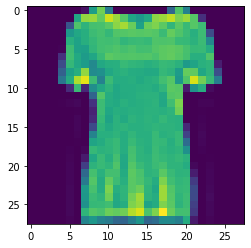

In [26]:
plt.imshow(x_train[10])

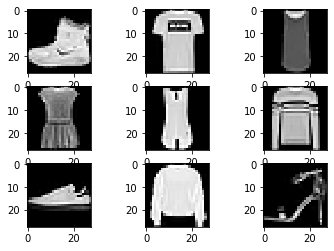

In [27]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [18]:
x=x_train
y=y_train
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train /= 255.0
x_test /= 255.0
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Using PCA:
We're using PCA to condense the images and use only a small fraction of the data of each image, therefore saving a lot of memory while still being able to predict each image with the same accuracy. 

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
pca.fit(x_train)
compressed_x_train = pca.transform(x_train)
decompressed_x_train = pca.inverse_transform(compressed_x_train)
compressed_x_test = pca.transform(x_test)
decompressed_x_test = pca.inverse_transform(compressed_x_test)
print("Number of components before PCA  = " + str(x_train.shape[1]))
print("Number of components after PCA 0.85 = " + str(pca.n_components_),"\n") 
print("Dimension of our data after PCA  = " + str(compressed_x_train.shape))
print("Dimension of our data after inverse transforming the PCA  = " + str(decompressed_x_train.shape))

Number of components before PCA  = 784
Number of components after PCA 0.85 = 43 

Dimension of our data after PCA  = (60000, 43)
Dimension of our data after inverse transforming the PCA  = (60000, 784)


###### Example of image after being compressed by the PCA, showing no major difference on the image:

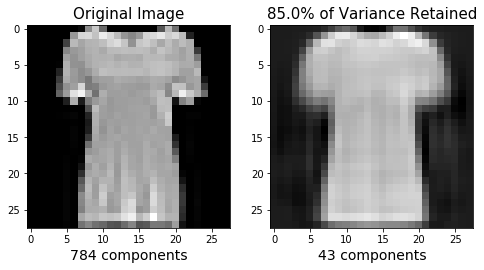

In [10]:
plt.figure(figsize=(8,4));

plt.subplot(1, 2, 1);
plt.imshow(x_train[10].reshape(x.shape[1], x.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(x_train.shape[1])+' components', fontsize = 14)
plt.title('Original Image', fontsize = 15);

plt.subplot(1, 2, 2);
plt.imshow(decompressed_x_train[10].reshape(x.shape[1], x.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(compressed_x_train.shape[1]) +' components', fontsize = 14)
plt.title(str(0.85 * 100) + '% of Variance Retained', fontsize = 15);

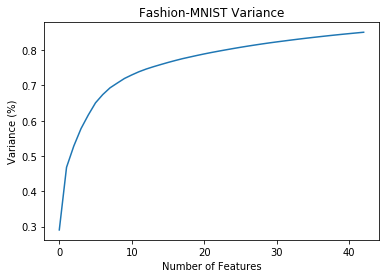

In [11]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)')
plt.title('Fashion-MNIST Variance')
plt.show()

In the graph above, we can infer that by using around 40 features, we can retain approximately 85% of the original data after being compressed. 

# Convolutional Neural Network:

In [69]:
((train_x, train_y), (test_x, test_y)) = fashion_mnist.load_data()
x_train = train_x[:,:,:,np.newaxis] / 255.0
x_test = test_x[:,:,:,np.newaxis] / 255.0
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
cnn_model.summary()
cnn_model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                125450    
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 32s 601us/sample - loss: 0.4325 - accuracy: 0.8494 - val_loss: 0.3304 - val_accuracy: 0.8808
Epoch 2/10
54000/54000 [======================

In [71]:
print("-----------------Convolutional Neural Network---------------")
print("CNN model loss and accuracy: ", "\n", cnn_model.evaluate(x_test, y_test))

-----------------Convolutional Neural Network---------------
10000/10000 [==============================] - 2s 193us/sample - loss: 0.2953 - accuracy: 0.8988
CNN model loss and accuracy:  
 [0.2953449152112007, 0.8988]


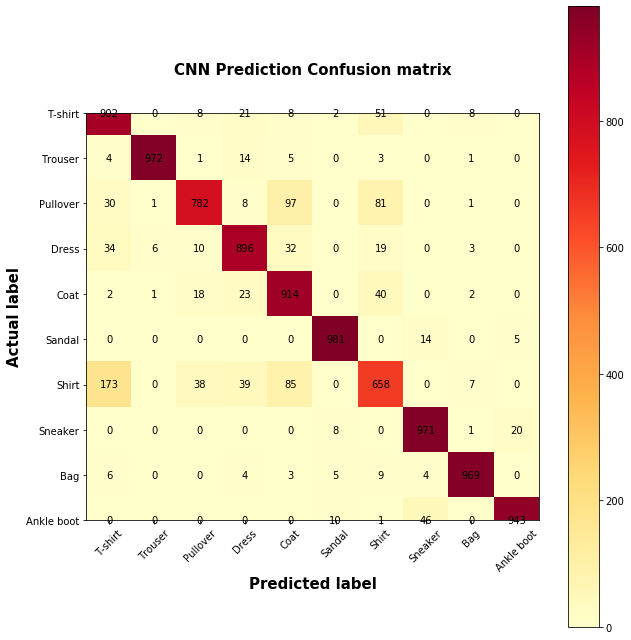

In [84]:
y_pred_cnn = cnn_model.predict_classes(x_test)
y_pred_series = pd.Series(y_pred_cnn)
cm = confusion_matrix(y_test, y_pred_series)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='YlOrRd')
plt.title('CNN Prediction Confusion matrix', size = 15, y=1.08, fontweight="bold")
plt.colorbar()
tick_marks = np.arange(10)

plt.xticks(tick_marks, ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
                       rotation=45, size = 10)
plt.yticks(tick_marks, ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
                       size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15, fontweight="bold")
plt.xlabel('Predicted label', size = 15, fontweight="bold")
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

# KNN:

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print(metrics.classification_report(y_test, y_pred_knn))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(knn,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

-----------------K-nearest neighbors Report---------------
F1 score: 0.8546439722018904
Accuracy score: 0.8554
Confusion matrix: 
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
     

In [35]:
print("------------K-nearest neighbors w/ PCA------------")
knn.fit(compressed_x_train,y_train)
y_pred_knn = knn.predict(compressed_x_test)
print(classification_report(y_test, y_pred_knn))

------------K-nearest neighbors w/ PCA------------
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.78      0.76      1000
           3       0.89      0.87      0.88      1000
           4       0.75      0.78      0.77      1000
           5       0.98      0.90      0.94      1000
           6       0.66      0.58      0.62      1000
           7       0.90      0.94      0.92      1000
           8       0.97      0.96      0.96      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# AdaBoost:

In [12]:
from sklearn.ensemble import AdaBoostClassifier
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=12)
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    adb_lst = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=10), n_estimators=50, learning_rate=learning_rate, random_state=93)
    adb_lst.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(adb_lst.score(x_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(adb_lst.score(x_test, y_test)),"\n")

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (testing): 0.838 

Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (testing): 0.846 

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (testing): 0.837 

Learning rate:  0.25
Accuracy score (training): 0.999
Accuracy score (testing): 0.841 

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (testing): 0.841 

Learning rate:  0.75
Accuracy score (training): 0.998
Accuracy score (testing): 0.838 

Learning rate:  1
Accuracy score (training): 0.992
Accuracy score (testing): 0.830 



In [13]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=10), n_estimators=50, random_state=93,learning_rate=0.075)
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)
adb_f1 = metrics.f1_score(y_test, y_pred_adb, average= "weighted")
adb_accuracy = metrics.accuracy_score(y_test, y_pred_adb)
adb_cm = metrics.confusion_matrix(y_test, y_pred_adb)
print("--------------------AdaBoost------------------")
print("F1 score: {}".format(adb_f1))
print("Accuracy score: {}".format(adb_accuracy))
print("Confusion matrix: \n", adb_cm)
print(metrics.classification_report(y_test, y_pred_adb))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(adb,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------AdaBoost------------------
F1 score: 0.8457245458229631
Accuracy score: 0.8460117548278757
Confusion matrix: 
 [[472   2   5  15   4   0  66   0   4   0]
 [  1 560   4  18   3   0   4   0   0   0]
 [  8   0 443   1  92   0  41   0   2   0]
 [ 25   8   5 516  26   0  17   0   1   0]
 [  3   0  66  23 446   1  43   0   1   0]
 [  0   0   0   1   0 530   0  15   4   5]
 [ 91   0  68  23  70   0 344   0   8   0]
 [  0   0   0   0   0  32   0 564   0  24]
 [  5   0   2   0   1   1  22   1 585   1]
 [  0   0   0   1   0  18   0  33   2 578]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       568
           1       0.98      0.95      0.97       590
           2       0.75      0.75      0.75       587
           3       0.86      0.86      0.86       598
           4       0.69      0.77      0.73       583
           5       0.91      0.95      0.93       555
           6       0.64      0.57      0.60       604
     

In [20]:
print("-------------AdaBoost w/ PCA-------------","\n")
adb.fit(compressed_x_train,y_train)
y_pred_adb = adb.predict(compressed_x_test)
adb_comp_accuracy = metrics.accuracy_score(y_test, y_pred_adb)
print("Accuracy score: {}".format(adb_comp_accuracy))
print(classification_report(y_test, y_pred_adb))

-------------AdaBoost w/ PCA------------- 

Accuracy score: 0.8138
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1000
           1       1.00      0.92      0.96      1000
           2       0.66      0.76      0.71      1000
           3       0.82      0.86      0.84      1000
           4       0.73      0.64      0.68      1000
           5       0.90      0.90      0.90      1000
           6       0.54      0.60      0.57      1000
           7       0.88      0.89      0.89      1000
           8       0.95      0.93      0.94      1000
           9       0.92      0.91      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.82     10000
weighted avg       0.82      0.81      0.82     10000



# Naive Bayes:

In [21]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
nb_f1 = metrics.f1_score(y_test, y_pred_nb, average= "weighted")
nb_accuracy = metrics.accuracy_score(y_test, y_pred_nb)
nb_cm = metrics.confusion_matrix(y_test, y_pred_nb)
print("--------------------Naive Bayes------------------")
print("F1 score: {}".format(nb_f1))
print("Accuracy score: {}".format(nb_accuracy))
print("Confusion matrix: \n", nb_cm)
print(metrics.classification_report(y_test, y_pred_nb))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(nb,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------Naive Bayes------------------
F1 score: 0.5561601931134046
Accuracy score: 0.5856
Confusion matrix: 
 [[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7  

In [24]:
print("---------------Naive Bayes w/ PCA---------------","\n")
nb.fit(compressed_x_train,y_train)
y_pred_nb = nb.predict(compressed_x_test)
nb_comp_accuracy = metrics.accuracy_score(y_test, y_pred_nb)
print("Accuracy score: {}".format(nb_comp_accuracy))
print(classification_report(y_test, y_pred_nb))

---------------Naive Bayes w/ PCA--------------- 

Accuracy score: 0.7661
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       1.00      0.89      0.94      1000
           2       0.66      0.62      0.64      1000
           3       0.78      0.80      0.79      1000
           4       0.71      0.67      0.69      1000
           5       0.85      0.79      0.82      1000
           6       0.47      0.48      0.48      1000
           7       0.82      0.87      0.85      1000
           8       0.81      0.87      0.84      1000
           9       0.88      0.91      0.89      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



##### Decision Tree:

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_f1 = metrics.f1_score(y_test, y_pred_dt, average= "weighted")
dt_accuracy = metrics.accuracy_score(y_test, y_pred_dt)
dt_cm = metrics.confusion_matrix(y_test, y_pred_dt)
print("--------------------Decision Tree------------------")
print("F1 score: {}".format(dt_f1))
print("Accuracy score: {}".format(dt_accuracy))
print("Confusion matrix: \n", dt_cm)
print(metrics.classification_report(y_test, y_pred_dt))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(dt,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------Decision Tree------------------
F1 score: 0.791093716083042
Accuracy score: 0.7904
Confusion matrix: 
 [[739   2  22  38  11   1 174   2  11   0]
 [  7 948   3  19   8   0  11   0   3   1]
 [ 22   1 648  22 152   0 142   1  10   2]
 [ 49  28  17 784  56   0  52   0  13   1]
 [ 16   3 171  57 636   0 115   0   2   0]
 [  1   2   1   3   0 883   2  55  18  35]
 [140   9 134  38  99   2 550   1  25   2]
 [  0   0   0   0   0  43   0 893   5  59]
 [ 10   1  16   9  12   9  15   7 915   6]
 [  0   0   0   0   1  26   0  60   5 908]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1000
           1       0.95      0.95      0.95      1000
           2       0.64      0.65      0.64      1000
           3       0.81      0.78      0.80      1000
           4       0.65      0.64      0.64      1000
           5       0.92      0.88      0.90      1000
           6       0.52      0.55      0.53      1000
           7 

In [26]:
print("----------------Decision Tree w/ PCA---------------")
dt.fit(compressed_x_train,y_train)
y_pred_dt = dt.predict(compressed_x_test)
dt_comp_accuracy = metrics.accuracy_score(y_test, y_pred_dt)
print("Accuracy score: {}".format(dt_comp_accuracy))
print(classification_report(y_test, y_pred_dt))

----------------Decision Tree w/ PCA---------------
Accuracy score: 0.7663
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.94      0.94      0.94      1000
           2       0.64      0.65      0.64      1000
           3       0.78      0.76      0.77      1000
           4       0.64      0.63      0.64      1000
           5       0.85      0.83      0.84      1000
           6       0.49      0.53      0.51      1000
           7       0.83      0.85      0.84      1000
           8       0.90      0.90      0.90      1000
           9       0.88      0.89      0.88      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



# Random Forest:

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_f1 = metrics.f1_score(y_test, y_pred_rf, average= "weighted")
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print("--------------------Random Forest------------------")
print("F1 score: {}".format(rf_f1))
print("Accuracy score: {}".format(rf_accuracy))
print("Confusion matrix: \n", rf_cm)
print(metrics.classification_report(y_test, y_pred_rf))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(rf,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------Random Forest------------------
F1 score: 0.8514113600140858
Accuracy score: 0.8534
Confusion matrix: 
 [[838   1  23  35   5   1  85   0  12   0]
 [  3 964   5  17   1   0  10   0   0   0]
 [ 15   3 795  10 127   0  49   0   1   0]
 [ 33   6  11 883  34   1  27   0   5   0]
 [  6   2 136  36 760   0  58   0   2   0]
 [  1   0   0   1   0 954   0  29   3  12]
 [186   2 133  33  97   0 527   0  22   0]
 [  0   0   0   0   0  36   0 921   0  43]
 [  5   1   6   6   6   4  11   3 958   0]
 [  0   0   1   1   0  11   0  51   2 934]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.80      0.75      1000
           3       0.86      0.88      0.87      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.53      0.60      1000
           7

In [20]:
rf = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
rf.fit(compressed_x_train, y_train)
y_pred_forest_pca = rf.predict(compressed_x_test)
rf_pca_f1 = metrics.f1_score(y_test, y_pred_forest_pca, average= "weighted")
rf_pca_accuracy = metrics.accuracy_score(y_test, y_pred_forest_pca)
rf_pca_cm = metrics.confusion_matrix(y_test, y_pred_forest_pca)
print("----------------Random Forest w/ PCA---------------")
print("F1 score: {}".format(rf_pca_f1))
print("Accuracy score: {}".format(rf_pca_accuracy))
print("Confusion matrix: \n", rf_pca_cm)
print(metrics.classification_report(y_test, y_pred_forest_pca))

----------------Random Forest w/ PCA---------------
F1 score: 0.860129784380126
Accuracy score: 0.8618
Confusion matrix: 
 [[858   0  20  29   4   2  71   0  16   0]
 [  5 965   4  18   4   0   2   0   2   0]
 [ 13   1 804  13 100   2  59   0   8   0]
 [ 34   4   9 880  34   0  33   0   6   0]
 [  1   0 107  39 789   1  54   0   9   0]
 [  1   0   0   0   0 924   0  45   3  27]
 [161   0 125  30  84   1 577   0  22   0]
 [  0   0   0   0   0  31   0 920   2  47]
 [  2   0   7   7   3   7   5   4 963   2]
 [  0   0   0   0   0  20   0  41   1 938]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.80      0.77      1000
           3       0.87      0.88      0.87      1000
           4       0.78      0.79      0.78      1000
           5       0.94      0.92      0.93      1000
           6       0.72      0.58      0.64      1000
           7 

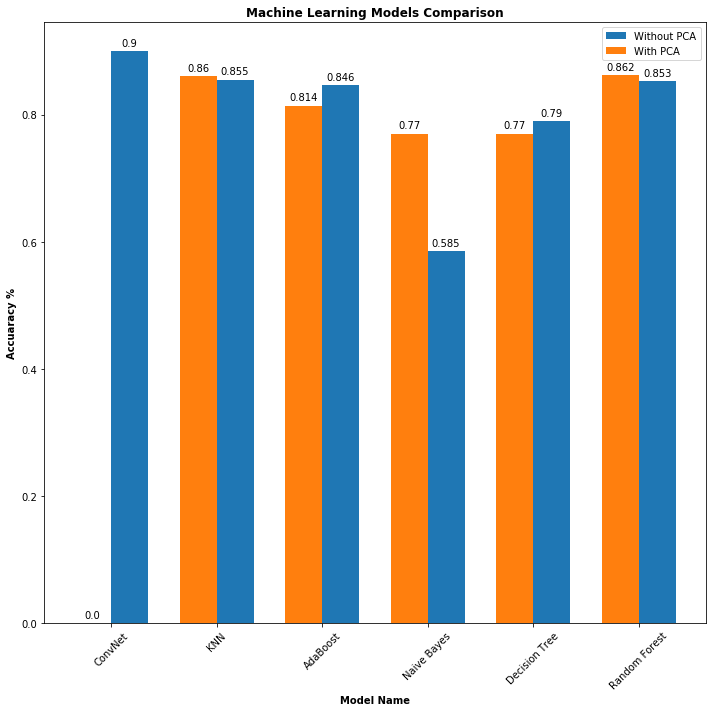

In [27]:
labels = ['ConvNet', 'KNN', 'AdaBoost','Naive Bayes', 'Decision Tree', 'Random Forest']
no_pca = [0.90, 0.855,0.846,0.585,0.79, 0.853]
with_pca = [0, 0.86, 0.814, 0.77, 0.77,0.862]

width = 0.35  
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x + width/2, no_pca, width)
rects2 = ax.bar(x - width/2, with_pca, width)
ax.set_title('Machine Learning Models Comparison', fontweight="bold")
ax.set_xlabel('Model Name', fontweight="bold")
ax.set_ylabel('Accuaracy %', fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(['Without PCA', 'With PCA'], loc='best')
plt.xticks(rotation=45)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()